In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline
import mpld3
from statsmodels.tsa.api import SimpleExpSmoothing
from sksurv.linear_model import CoxPHSurvivalAnalysis



mpld3.enable_notebook()

In [2]:
df_original = pd.read_csv('SteamCharts.csv')
df = df_original.copy()

/Users/eduardomedina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,27,29,31,52,67,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df.replace(np.nan,-1)

In [4]:
df = df.loc[df['Peak_Players'] == 1]
df_dummy = df_original.loc[df_original['Peak_Players'] == 1]

In [5]:
df.columns.values[6:]
for i in df.columns.values[6:]:
    df[i]=df[i].astype(float)

In [6]:
lista = []
for i in df.index:
    if (df.loc[i].values[6:].max() == 0) or (df.loc[i].values[6:].max() < 100):
        lista.append(i)

print('the number of values lost due to having zeroes and less than 100 is ',len(lista))

df = df.drop(lista)
df = df.drop(df.loc[df['April_2021'] == -1].index)
df = df.rename(columns={"Last_30_Days": "May_2021"}, errors="raise")

the number of values lost due to having zeroes and less than 100 is  6217


In [7]:
#Remove "_" from column dates
old = list(df.columns.values[6:])
new = []
for i in old:
    new.append(i.replace("_"," "))
new


# Make dictionary to change columns
dic = {}

for key in range(len(old)):
    dic[old[key]] = new[key]

#Replace columns
df = df.rename(columns=dic)



In [8]:
#Exponential fit on data


df_dummy_right = df.drop(columns = ['Name', 'App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players']).copy()
df_dummy_left = df.drop(columns = df.columns[6:]).copy()


def Reverse(lst):
    return [ele for ele in reversed(lst)]


for index in df_dummy_right.index:
    
    a = list(df_dummy_right.loc[index])
    b = np.arange(0,len(a))
    arr = np.array(Reverse(a))
    ses = SimpleExpSmoothing(arr)
    fit = ses.fit(smoothing_level = .3 , optimized=False)
    fitlist = list(fit.fittedvalues)
    fitlistrev = Reverse(fitlist)
    df_dummy_right.loc[index] = fitlistrev



df = pd.concat([df_dummy_left, df_dummy_right], axis=1)




/Users/eduardomedina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [9]:
def days_to_glory(index):
#Find when it was released
    c = 0
    flag = False
    for i in list(df.loc[index].values):
        if (type(i) == type(np.array([.1])[0])):
            if i < 0:
                release =  pd.Timestamp(df.columns[c-1]) 
                flag = True
                break
        c +=1
    if flag == False:
        release = pd.Timestamp(df.columns[-1]) 
#Find when it reached maximum
    c = -1 
    for i in reversed(list(df.loc[index].values)):
        if i == df.loc[index].values[6:].max():
       
            maximum = pd.Timestamp(df.columns[c])
            break
        c -= 1
    
    x = str(maximum - release)
    return float(x.split(' ')[0])


In [10]:
def life_time(index):
    c = -1 
    for i in reversed(list(df.loc[index].values)):
        if i == df.loc[index].values[6:].max():
    
            maximum = pd.Timestamp(df.columns[c])
            break
        c -= 1 
    trunc = df.loc[index].values[:(c+len(df.loc[index].values))]
    trunc = trunc[6:]
    d = -1 
    flag = False
    for i in reversed(list(trunc)):
        if i <= df.loc[index].values[6:].max()*.10:
            death = pd.Timestamp(df.columns[d+c])
            flag = True
            break
        d -= 1 
    if flag == False:
        x = str(pd.Timestamp('May 2021') - maximum)
        return float(x.split(' ')[0]) , False
    else:
        x = str(death - maximum)
        return float(x.split(' ')[0]) , True


In [11]:
days = []
games_alive = []
bad_index = []
c = 0
for index in df.index:
    print(c/len(df.index)*100)
    c += 1
    if days_to_glory(index) >= 0:
        days.append(days_to_glory(index))
    if days_to_glory(index) == 0:
        games_alive.append(index)
    if days_to_glory(index) < 0:
        bad_index.append(index)
    
df = df.drop(bad_index)


0.0
0.01650437365901964
0.03300874731803928
0.04951312097705893
0.06601749463607856
0.0825218682950982
0.09902624195411786
0.11553061561313747
0.13203498927215712
0.14853936293117675
0.1650437365901964
0.18154811024921605
0.1980524839082357
0.21455685756725532
0.23106123122627495
0.2475656048852946
0.26406997854431424
0.2805743522033339
0.2970787258623535
0.3135830995213732
0.3300874731803928
0.34659184683941247
0.3630962204984321
0.37960059415745173
0.3961049678164714
0.412609341475491
0.42911371513451063
0.4456180887935303
0.4621224624525499
0.47862683611156953
0.4951312097705892
0.5116355834296088
0.5281399570886285
0.5446443307476482
0.5611487044066678
0.5776530780656874
0.594157451724707
0.6106618253837267
0.6271661990427464
0.643670572701766
0.6601749463607856
0.6766793200198052
0.6931836936788249
0.7096880673378445
0.7261924409968642
0.7426968146558838
0.7592011883149035
0.775705561973923
0.7922099356329428
0.8087143092919623
0.825218682950982
0.8417230566100017
0.85822743026902

7.393959399240798
7.410463772899818
7.4269681465588375
7.443472520217857
7.459976893876877
7.476481267535898
7.492985641194918
7.509490014853936
7.525994388512956
7.5424987621719755
7.559003135830995
7.575507509490015
7.592011883149034
7.608516256808054
7.625020630467073
7.641525004126093
7.6580293777851125
7.674533751444133
7.6910381251031525
7.707542498762172
7.724046872421192
7.740551246080211
7.757055619739231
7.77355999339825
7.79006436705727
7.80656874071629
7.823073114375309
7.839577488034329
7.856081861693348
7.872586235352369
7.889090609011388
7.905594982670408
7.9220993563294275
7.938603729988447
7.955108103647467
7.971612477306486
7.988116850965506
8.004621224624525
8.021125598283545
8.037629971942565
8.054134345601584
8.070638719260605
8.087143092919625
8.103647466578643
8.120151840237662
8.136656213896682
8.153160587555702
8.169664961214721
8.18616933487374
8.20267370853276
8.21917808219178
8.2356824558508
8.252186829509819
8.26869120316884
8.28519557682786
8.3016999504868

14.754910051163558
14.771414424822579
14.787918798481597
14.804423172140618
14.820927545799636
14.837431919458657
14.853936293117675
14.870440666776696
14.886945040435714
14.903449414094736
14.919953787753753
14.936458161412775
14.952962535071796
14.969466908730814
14.985971282389835
15.002475656048853
15.018980029707873
15.035484403366892
15.051988777025912
15.068493150684931
15.084997524343951
15.10150189800297
15.11800627166199
15.134510645321008
15.15101501898003
15.16751939263905
15.184023766298068
15.20052813995709
15.217032513616108
15.233536887275129
15.250041260934147
15.266545634593168
15.283050008252186
15.299554381911207
15.316058755570225
15.332563129229246
15.349067502888266
15.365571876547286
15.382076250206305
15.398580623865325
15.415084997524344
15.431589371183364
15.448093744842383
15.464598118501401
15.481102492160423
15.49760686581944
15.514111239478462
15.53061561313748
15.5471199867965
15.563624360455522
15.58012873411454
15.596633107773561
15.61313748143258
15.6

22.099356329427298
22.11586070308632
22.132365076745337
22.14886945040436
22.165373824063376
22.181878197722398
22.198382571381416
22.214886945040433
22.231391318699455
22.247895692358473
22.264400066017494
22.28090443967651
22.297408813335533
22.31391318699455
22.330417560653572
22.346921934312594
22.36342630797161
22.379930681630633
22.39643505528965
22.412939428948672
22.42944380260769
22.44594817626671
22.46245254992573
22.47895692358475
22.495461297243768
22.51196567090279
22.52847004456181
22.54497441822083
22.56147879187985
22.577983165538868
22.59448753919789
22.610991912856907
22.627496286515928
22.644000660174946
22.660505033833967
22.677009407492985
22.693513781152006
22.710018154811024
22.726522528470046
22.743026902129067
22.759531275788085
22.776035649447106
22.792540023106124
22.809044396765145
22.825548770424163
22.84205314408318
22.858557517742202
22.87506189140122
22.89156626506024
22.90807063871926
22.92457501237828
22.9410793860373
22.95758375969632
22.9740881333553

29.476811355009076
29.493315728668097
29.509820102327115
29.526324475986137
29.542828849645158
29.559333223304172
29.575837596963193
29.592341970622215
29.608846344281236
29.62535071794025
29.641855091599272
29.658359465258293
29.674863838917314
29.69136821257633
29.70787258623535
29.72437695989437
29.740881333553393
29.757385707212414
29.77389008087143
29.79039445453045
29.80689882818947
29.823403201848492
29.839907575507507
29.856411949166528
29.87291632282555
29.88942069648457
29.905925070143592
29.922429443802606
29.938933817461628
29.95543819112065
29.97194256477967
29.988446938438685
30.004951312097706
30.021455685756727
30.037960059415745
30.054464433074763
30.070968806733784
30.087473180392806
30.103977554051824
30.120481927710845
30.136986301369863
30.153490675028884
30.169995048687902
30.186499422346923
30.20300379600594
30.21950816966496
30.23601254332398
30.252516916983
30.269021290642016
30.285525664301037
30.30203003796006
30.31853441161908
30.3350387852781
30.35154315893

36.90377950156792
36.920283875226936
36.936788248885954
36.95329262254498
36.969796996203996
36.986301369863014
37.00280574352203
37.01931011718106
37.035814490840075
37.05231886449909
37.06882323815811
37.085327611817135
37.10183198547615
37.11833635913517
37.13484073279419
37.151345106453206
37.16784948011223
37.18435385377125
37.20085822743027
37.217362601089285
37.23386697474831
37.25037134840733
37.266875722066345
37.28338009572536
37.29988446938439
37.316388843043406
37.33289321670243
37.34939759036144
37.365901964020466
37.382406337679484
37.39891071133851
37.41541508499752
37.431919458656544
37.44842383231556
37.46492820597459
37.481432579633605
37.49793695329262
37.51444132695164
37.530945700610665
37.54745007426968
37.5639544479287
37.58045882158772
37.596963195246744
37.61346756890576
37.62997194256478
37.6464763162238
37.66298068988282
37.67948506354184
37.69598943720086
37.712493810859876
37.7289981845189
37.74550255817792
37.762006931836936
37.778511305495954
37.795015679

44.33074764812675
44.34725202178577
44.363756395444796
44.38026076910381
44.39676514276283
44.41326951642185
44.42977389008087
44.44627826373989
44.46278263739891
44.479287011057934
44.495791384716945
44.51229575837597
44.52880013203499
44.54530450569401
44.56180887935302
44.57831325301205
44.594817626671066
44.61132200033009
44.6278263739891
44.64433074764813
44.660835121307144
44.67733949496617
44.69384386862519
44.710348242284205
44.72685261594322
44.74335698960225
44.759861363261265
44.77636573692028
44.7928701105793
44.809374484238326
44.825878857897344
44.84238323155636
44.85888760521538
44.875391978874404
44.89189635253342
44.90840072619244
44.92490509985146
44.94140947351048
44.9579138471695
44.97441822082852
44.990922594487536
45.00742696814656
45.02393134180558
45.0404357154646
45.05694008912362
45.07344446278264
45.08994883644166
45.106453210100675
45.1229575837597
45.13946195741872
45.155966331077735
45.17247070473675
45.18897507839578
45.20547945205479
45.221983825713814
4

51.90625515761676
51.92275953127579
51.939263904934805
51.95576827859383
51.97227265225285
51.98877702591187
52.00528139957089
52.0217857732299
52.03829014688892
52.054794520547944
52.07129889420696
52.087803267865986
52.104307641525004
52.12081201518403
52.13731638884305
52.153820762502065
52.170325136161075
52.1868295098201
52.20333388347912
52.21983825713814
52.23634263079716
52.252847004456186
52.2693513781152
52.28585575177422
52.302360125433246
52.31886449909226
52.335368872751275
52.3518732464103
52.36837762006932
52.384881993728335
52.40138636738736
52.41789074104638
52.4343951147054
52.45089948836442
52.46740386202343
52.48390823568245
52.500412609341474
52.51691698300049
52.53342135665952
52.549925730318535
52.56643010397756
52.58293447763658
52.59943885129559
52.615943224954606
52.63244759861363
52.64895197227265
52.66545634593167
52.68196071959069
52.698465093249716
52.714969466908734
52.73147384056776
52.74797821422676
52.76448258788579
52.780986961544805
52.79749133520383

59.366232051493654
59.38273642515266
59.39924079881168
59.4157451724707
59.432249546129725
59.44875391978874
59.46525829344777
59.481762667106786
59.4982670407658
59.51477141442483
59.53127578808384
59.54778016174286
59.56428453540188
59.5807889090609
59.59729328271992
59.61379765637894
59.63030203003796
59.646806403696985
59.663310777356
59.67981515101501
59.69631952467404
59.712823898333056
59.729328271992074
59.7458326456511
59.76233701931012
59.77884139296914
59.79534576662816
59.811850140287184
59.828354513946195
59.84485888760521
59.86136326126423
59.877867634923255
59.89437200858227
59.9108763822413
59.927380755900316
59.94388512955934
59.960389503218344
59.97689387687737
59.99339825053639
60.00990262419541
60.02640699785443
60.042911371513455
60.05941574517247
60.07592011883149
60.092424492490515
60.108928866149526
60.125433239808544
60.14193761346757
60.15844198712659
60.17494636078561
60.19145073444463
60.20795510810365
60.22445948176267
60.24096385542169
60.2574682290807
60.

66.94173956098366
66.95824393464268
66.9747483083017
66.99125268196072
67.00775705561975
67.02426142927877
67.04076580293777
67.0572701765968
67.07377455025582
67.09027892391484
67.10678329757386
67.12328767123287
67.1397920448919
67.15629641855092
67.17280079220993
67.18930516586894
67.20580953952798
67.222313913187
67.23881828684601
67.25532266050503
67.27182703416406
67.28833140782308
67.3048357814821
67.3213401551411
67.33784452880013
67.35434890245915
67.37085327611817
67.38735764977719
67.40386202343622
67.42036639709524
67.43687077075425
67.45337514441327
67.46987951807229
67.48638389173131
67.50288826539033
67.51939263904934
67.53589701270838
67.55240138636739
67.56890576002641
67.58541013368543
67.60191450734445
67.61841888100346
67.63492325466248
67.6514276283215
67.66793200198052
67.68443637563955
67.70094074929857
67.71744512295759
67.7339494966166
67.75045387027562
67.76695824393464
67.78346261759366
67.79996699125267
67.8164713649117
67.83297573857072
67.84948011222974
67

74.66578643340486
74.68229080706386
74.69879518072288
74.71529955438191
74.73180392804093
74.74830830169995
74.76481267535897
74.78131704901799
74.79782142267702
74.81432579633604
74.83083016999504
74.84733454365407
74.86383891731309
74.8803432909721
74.89684766463112
74.91335203829014
74.92985641194917
74.94636078560819
74.96286515926721
74.97936953292623
74.99587390658525
75.01237828024426
75.02888265390328
75.0453870275623
75.06189140122133
75.07839577488035
75.09490014853937
75.11140452219837
75.1279088958574
75.14441326951642
75.16091764317544
75.17742201683446
75.19392639049349
75.2104307641525
75.22693513781152
75.24343951147054
75.25994388512956
75.27644825878858
75.2929526324476
75.30945700610661
75.32596137976564
75.34246575342466
75.35897012708368
75.3754745007427
75.39197887440172
75.40848324806073
75.42498762171975
75.44149199537877
75.4579963690378
75.47450074269682
75.49100511635584
75.50750949001485
75.52401386367387
75.5405182373329
75.55702261099191
75.57352698465093


82.29080706387192
82.30731143753096
82.32381581118996
82.34032018484898
82.356824558508
82.37332893216703
82.38983330582604
82.40633767948506
82.42284205314408
82.43934642680311
82.45585080046213
82.47235517412113
82.48885954778015
82.50536392143918
82.5218682950982
82.53837266875722
82.55487704241624
82.57138141607527
82.58788578973429
82.6043901633933
82.62089453705231
82.63739891071134
82.65390328437036
82.67040765802938
82.6869120316884
82.70341640534741
82.71992077900644
82.73642515266546
82.75292952632448
82.7694338999835
82.78593827364251
82.80244264730153
82.81894702096055
82.83545139461957
82.8519557682786
82.86846014193762
82.88496451559664
82.90146888925565
82.91797326291467
82.93447763657369
82.9509820102327
82.96748638389172
82.98399075755076
83.00049513120977
83.01699950486879
83.03350387852781
83.05000825218683
83.06651262584585
83.08301699950486
83.09952137316388
83.11602574682291
83.13253012048193
83.14903449414095
83.16553886779997
83.18204324145898
83.198547615118
83

89.86631457336193
89.88281894702097
89.89932332067998
89.915827694339
89.93233206799802
89.94883644165704
89.96534081531607
89.98184518897507
89.99834956263409
90.01485393629312
90.03135830995214
90.04786268361116
90.06436705727018
90.0808714309292
90.09737580458822
90.11388017824724
90.13038455190625
90.14688892556528
90.1633932992243
90.17989767288331
90.19640204654233
90.21290642020135
90.22941079386038
90.2459151675194
90.2624195411784
90.27892391483743
90.29542828849645
90.31193266215547
90.32843703581449
90.3449414094735
90.36144578313254
90.37795015679156
90.39445453045057
90.41095890410958
90.42746327776861
90.44396765142763
90.46047202508664
90.47697639874566
90.4934807724047
90.50998514606371
90.52648951972273
90.54299389338175
90.55949826704077
90.57600264069978
90.5925070143588
90.60901138801782
90.62551576167685
90.64202013533587
90.65852450899489
90.6750288826539
90.69153325631292
90.70803762997194
90.72454200363096
90.74104637728998
90.75755075094901
90.77405512460803
90

97.47483083016999
97.49133520382901
97.50783957748803
97.52434395114705
97.54084832480608
97.5573526984651
97.57385707212411
97.59036144578313
97.60686581944216
97.62337019310117
97.63987456676018
97.6563789404192
97.67288331407823
97.68938768773725
97.70589206139627
97.72239643505529
97.73890080871432
97.75540518237334
97.77190955603234
97.78841392969136
97.80491830335039
97.82142267700941
97.83792705066843
97.85443142432744
97.87093579798648
97.8874401716455
97.90394454530451
97.92044891896352
97.93695329262255
97.95345766628157
97.96996203994058
97.9864664135996
98.00297078725862
98.01947516091765
98.03597953457667
98.05248390823567
98.0689882818947
98.08549265555372
98.10199702921274
98.11850140287176
98.13500577653078
98.15151015018981
98.16801452384883
98.18451889750784
98.20102327116686
98.21752764482588
98.2340320184849
98.25053639214391
98.26704076580293
98.28354513946196
98.30004951312098
98.31655388678
98.33305826043902
98.34956263409804
98.36606700775705
98.38257138141607
9

In [12]:
life = []
#False means alive
status = []
c = 0
for index in df.index:
    print(c/len(df.index)*100)
    life.append(life_time(index)[0])
    status.append(life_time(index)[1])
    c += 1


0.0
0.01656726308813784
0.03313452617627568
0.049701789264413515
0.06626905235255136
0.08283631544068919
0.09940357852882703
0.11597084161696489
0.13253810470510272
0.14910536779324055
0.16567263088137837
0.18223989396951623
0.19880715705765406
0.21537442014579194
0.23194168323392977
0.2485089463220676
0.26507620941020543
0.28164347249834326
0.2982107355864811
0.3147779986746189
0.33134526176275675
0.34791252485089463
0.36447978793903246
0.3810470510271703
0.3976143141153081
0.414181577203446
0.4307488402915839
0.44731610337972166
0.46388336646785955
0.4804506295559973
0.4970178926441352
0.513585155732273
0.5301524188204109
0.5467196819085487
0.5632869449966865
0.5798542080848245
0.5964214711729622
0.6129887342611001
0.6295559973492378
0.6461232604373758
0.6626905235255135
0.6792577866136514
0.6958250497017893
0.7123923127899271
0.7289595758780649
0.7455268389662028
0.7620941020543406
0.7786613651424784
0.7952286282306162
0.8117958913187541
0.828363154406892
0.8449304174950298
0.861497

7.438701126573891
7.455268389662027
7.4718356527501655
7.488402915838304
7.504970178926442
7.521537442014579
7.538104705102717
7.5546719681908545
7.571239231278993
7.58780649436713
7.604373757455268
7.620941020543406
7.637508283631544
7.654075546719683
7.670642809807819
7.687210072895957
7.703777335984095
7.7203445990722335
7.736911862160372
7.75347912524851
7.770046388336647
7.786613651424784
7.8031809145129225
7.81974817760106
7.836315440689198
7.852882703777336
7.869449966865474
7.886017229953611
7.902584493041749
7.919151756129887
7.935719019218025
7.952286282306163
7.9688535453943015
7.98542080848244
8.001988071570576
8.018555334658714
8.035122597746852
8.05168986083499
8.068257123923129
8.084824387011267
8.101391650099403
8.117958913187541
8.13452617627568
8.151093439363818
8.167660702451956
8.184227965540094
8.20079522862823
8.217362491716369
8.233929754804507
8.250497017892645
8.267064280980781
8.28363154406892
8.300198807157058
8.316766070245194
8.333333333333332
8.34990059642

14.943671305500331
14.96023856858847
14.976805831676607
14.993373094764745
15.009940357852884
15.026507620941022
15.043074884029158
15.059642147117296
15.076209410205434
15.092776673293573
15.109343936381709
15.125911199469847
15.142478462557985
15.159045725646122
15.17561298873426
15.192180251822398
15.208747514910536
15.225314777998674
15.241882041086813
15.25844930417495
15.275016567263089
15.291583830351227
15.308151093439365
15.324718356527503
15.341285619615638
15.357852882703776
15.374420145791914
15.390987408880052
15.40755467196819
15.424121935056329
15.440689198144467
15.457256461232605
15.473823724320743
15.490390987408881
15.50695825049702
15.523525513585156
15.540092776673294
15.55666003976143
15.573227302849569
15.589794565937707
15.606361829025845
15.622929092113983
15.63949635520212
15.656063618290258
15.672630881378396
15.689198144466534
15.705765407554672
15.72233267064281
15.738899933730949
15.755467196819087
15.772034459907221
15.78860172299536
15.805168986083498
15

22.29953611663353
22.316103379721667
22.332670642809806
22.349237905897944
22.365805168986082
22.38237243207422
22.39893969516236
22.415506958250496
22.432074221338635
22.448641484426773
22.46520874751491
22.48177601060305
22.498343273691187
22.514910536779322
22.53147779986746
22.548045062955598
22.564612326043736
22.581179589131875
22.597746852220013
22.61431411530815
22.63088137839629
22.647448641484427
22.664015904572565
22.680583167660703
22.69715043074884
22.71371769383698
22.730284956925114
22.746852220013253
22.76341948310139
22.77998674618953
22.796554009277667
22.813121272365805
22.829688535453943
22.84625579854208
22.86282306163022
22.879390324718358
22.895957587806496
22.912524850894634
22.929092113982772
22.945659377070907
22.962226640159045
22.978793903247183
22.99536116633532
23.01192842942346
23.028495692511598
23.045062955599736
23.061630218687874
23.078197481776012
23.09476474486415
23.11133200795229
23.127899271040427
23.144466534128565
23.1610337972167
23.1776010603

29.67196819085487
29.68853545394301
29.705102717031146
29.721669980119287
29.738237243207422
29.754804506295564
29.7713717693837
29.787939032471833
29.804506295559975
29.82107355864811
29.83764082173625
29.854208084824386
29.870775347912527
29.887342611000662
29.903909874088804
29.92047713717694
29.93704440026508
29.953611663353215
29.970178926441353
29.98674618952949
30.003313452617626
30.019880715705767
30.036447978793902
30.053015241882044
30.069582504970178
30.086149768058316
30.102717031146454
30.119284294234593
30.13585155732273
30.15241882041087
30.168986083499007
30.185553346587145
30.20212060967528
30.218687872763418
30.235255135851556
30.251822398939694
30.268389662027833
30.28495692511597
30.30152418820411
30.318091451292243
30.334658714380385
30.35122597746852
30.36779324055666
30.384360503644796
30.400927766732938
30.417495029821072
30.434062292909214
30.45062955599735
30.467196819085483
30.483764082173625
30.50033134526176
30.5168986083499
30.533465871438036
30.5500331345

37.094102054340624
37.110669317428766
37.1272365805169
37.14380384360504
37.16037110669318
37.17693836978131
37.19350563286945
37.21007289595759
37.22664015904573
37.243207422133864
37.259774685222006
37.27634194831014
37.29290921139828
37.30947647448642
37.32604373757455
37.34261100066269
37.35917826375083
37.37574552683897
37.392312789927104
37.408880053015245
37.42544731610338
37.44201457919152
37.458581842279656
37.47514910536779
37.49171636845593
37.50828363154407
37.52485089463221
37.541418157720344
37.55798542080848
37.57455268389662
37.591119946984755
37.607687210072896
37.62425447316103
37.64082173624917
37.65738899933731
37.67395626242545
37.69052352551358
37.70709078860172
37.72365805168986
37.740225314777994
37.756792577866136
37.77335984095427
37.78992710404241
37.80649436713055
37.82306163021869
37.83962889330682
37.85619615639496
37.8727634194831
37.889330682571234
37.905897945659376
37.92246520874751
37.93903247183565
37.95559973492379
37.97216699801193
37.9887342611000

44.69847581179589
44.71504307488403
44.731610337972164
44.748177601060306
44.76474486414844
44.78131212723658
44.79787939032472
44.81444665341285
44.83101391650099
44.84758117958913
44.86414844267727
44.880715705765404
44.897282968853546
44.91385023194168
44.93041749502982
44.94698475811796
44.9635520212061
44.98011928429423
44.996686547382374
45.01325381047051
45.029821073558644
45.046388336646785
45.06295559973492
45.07952286282306
45.096090125911196
45.11265738899934
45.12922465208747
45.145791915175614
45.16235917826375
45.17892644135189
45.195493704440025
45.21206096752817
45.2286282306163
45.245195493704436
45.26176275679258
45.27833001988071
45.294897282968854
45.31146454605699
45.32803180914513
45.344599072233265
45.36116633532141
45.37773359840954
45.39430086149768
45.41086812458582
45.42743538767396
45.444002650762094
45.46056991385023
45.47713717693837
45.493704440026505
45.51027170311465
45.52683896620278
45.54340622929092
45.55997349237906
45.5765407554672
45.5931080185553

52.335984095427435
52.352551358515576
52.36911862160372
52.385685884691846
52.40225314777999
52.41882041086813
52.43538767395626
52.4519549370444
52.46852220013254
52.48508946322068
52.50165672630881
52.51822398939695
52.53479125248509
52.551358515573234
52.56792577866136
52.584493041749504
52.601060304837645
52.61762756792577
52.634194831013914
52.650762094102056
52.6673293571902
52.683896620278325
52.70046388336647
52.71703114645461
52.73359840954275
52.75016567263088
52.76673293571902
52.78330019880716
52.7998674618953
52.81643472498343
52.83300198807157
52.849569251159714
52.86613651424784
52.88270377733598
52.899271040424125
52.91583830351227
52.932405566600394
52.948972829688536
52.96554009277668
52.98210735586481
52.99867461895295
53.01524188204109
53.03180914512923
53.04837640821736
53.0649436713055
53.08151093439364
53.09807819748178
53.11464546056991
53.13121272365805
53.147779986746194
53.16434724983433
53.18091451292246
53.197481776010605
53.21404903909874
53.23061630218688

59.85752153744202
59.87408880053016
59.89065606361829
59.90722332670643
59.92379058979457
59.940357852882705
59.95692511597084
59.97349237905898
59.990059642147116
60.00662690523525
60.02319416832339
60.039761431411534
60.05632869449967
60.072895957587804
60.089463220675945
60.10603048376409
60.12259774685222
60.139165009940356
60.1557322730285
60.17229953611663
60.188866799204774
60.20543406229291
60.222001325381044
60.238568588469185
60.25513585155732
60.27170311464546
60.288270377733596
60.30483764082174
60.32140490390987
60.337972166998014
60.35453943008615
60.37110669317429
60.387673956262425
60.40424121935056
60.4208084824387
60.437375745526836
60.45394300861497
60.47051027170311
60.487077534791254
60.50364479787939
60.52021206096752
60.536779324055665
60.55334658714381
60.56991385023194
60.586481113320076
60.60304837640822
60.61961563949636
60.63618290258449
60.65275016567263
60.66931742876077
60.6858846918489
60.70245195493704
60.71901921802518
60.73558648111332
60.752153744201

67.44532803180915
67.46189529489727
67.47846255798542
67.49502982107356
67.5115970841617
67.52816434724983
67.54473161033798
67.56129887342611
67.57786613651426
67.59443339960238
67.61100066269053
67.62756792577866
67.6441351888668
67.66070245195493
67.67726971504308
67.69383697813122
67.71040424121935
67.72697150430749
67.74353876739563
67.76010603048377
67.7766732935719
67.79324055666004
67.80980781974819
67.82637508283631
67.84294234592446
67.85950960901259
67.87607687210073
67.89264413518886
67.90921139827701
67.92577866136514
67.94234592445328
67.95891318754141
67.97548045062956
67.9920477137177
68.00861497680583
68.02518223989397
68.04174950298211
68.05831676607025
68.07488402915838
68.09145129224652
68.10801855533467
68.1245858184228
68.14115308151094
68.15772034459907
68.1742876076872
68.19085487077535
68.20742213386349
68.22398939695162
68.24055666003976
68.2571239231279
68.27369118621604
68.29025844930418
68.30682571239231
68.32339297548044
68.33996023856858
68.35652750165673

75.23194168323393
75.24850894632206
75.26507620941021
75.28164347249835
75.29821073558648
75.31477799867461
75.33134526176276
75.3479125248509
75.36447978793903
75.38104705102717
75.39761431411532
75.41418157720344
75.43074884029159
75.44731610337972
75.46388336646785
75.48045062955599
75.49701789264414
75.51358515573227
75.5301524188204
75.54671968190854
75.56328694499669
75.57985420808483
75.59642147117296
75.6129887342611
75.62955599734924
75.64612326043738
75.66269052352551
75.67925778661365
75.6958250497018
75.71239231278992
75.72895957587806
75.7455268389662
75.76209410205435
75.77866136514247
75.79522862823062
75.81179589131875
75.8283631544069
75.84493041749502
75.86149768058317
75.8780649436713
75.89463220675944
75.91119946984757
75.92776673293572
75.94433399602386
75.96090125911199
75.97746852220013
75.99403578528828
76.01060304837641
76.02717031146454
76.04373757455268
76.06030483764083
76.07687210072896
76.0934393638171
76.11000662690523
76.12657388999338
76.1431411530815
7

82.90258449304176
82.91915175612988
82.93571901921803
82.95228628230616
82.96885354539431
82.98542080848243
83.00198807157058
83.01855533465871
83.03512259774686
83.05168986083498
83.06825712392313
83.08482438701127
83.1013916500994
83.11795891318754
83.13452617627568
83.15109343936382
83.16766070245195
83.18422796554009
83.20079522862824
83.21736249171637
83.2339297548045
83.25049701789264
83.26706428098079
83.28363154406891
83.30019880715706
83.3167660702452
83.33333333333334
83.34990059642146
83.36646785950961
83.38303512259775
83.3996023856859
83.41616964877402
83.43273691186216
83.4493041749503
83.46587143803845
83.48243870112657
83.49900596421472
83.51557322730285
83.53214049039099
83.54870775347912
83.56527501656727
83.5818422796554
83.59840954274354
83.61497680583167
83.63154406891982
83.64811133200796
83.66467859509609
83.68124585818423
83.69781312127238
83.7143803843605
83.73094764744864
83.74751491053678
83.76408217362493
83.78064943671305
83.7972166998012
83.81378396288933


90.57322730284957
90.58979456593771
90.60636182902584
90.62292909211398
90.63949635520213
90.65606361829026
90.6726308813784
90.68919814446653
90.70576540755468
90.72233267064281
90.73889993373095
90.75546719681908
90.77203445990722
90.78860172299537
90.8051689860835
90.82173624917164
90.83830351225977
90.85487077534792
90.87143803843605
90.88800530152419
90.90457256461232
90.92113982770046
90.9377070907886
90.95427435387674
90.97084161696488
90.98740888005301
91.00397614314116
91.0205434062293
91.03711066931743
91.05367793240556
91.0702451954937
91.08681245858185
91.10337972166998
91.11994698475812
91.13651424784625
91.1530815109344
91.16964877402253
91.18621603711067
91.2027833001988
91.21935056328695
91.23591782637507
91.25248508946322
91.26905235255136
91.2856196156395
91.30218687872762
91.31875414181577
91.33532140490391
91.35188866799204
91.36845593108018
91.38502319416833
91.40159045725646
91.4181577203446
91.43472498343273
91.45129224652088
91.46785950960901
91.48442677269715
9

98.24387011265739
98.26043737574552
98.27700463883366
98.29357190192181
98.31013916500993
98.32670642809808
98.34327369118621
98.35984095427436
98.37640821736248
98.39297548045063
98.40954274353876
98.42611000662691
98.44267726971503
98.45924453280318
98.47581179589132
98.49237905897945
98.50894632206759
98.52551358515574
98.54208084824387
98.558648111332
98.57521537442014
98.59178263750829
98.60834990059642
98.62491716368456
98.64148442677269
98.65805168986084
98.67461895294898
98.69118621603711
98.70775347912524
98.7243207422134
98.74088800530151
98.75745526838966
98.7740225314778
98.79058979456595
98.80715705765407
98.82372432074222
98.84029158383035
98.8568588469185
98.87342611000662
98.88999337309477
98.9065606361829
98.92312789927104
98.93969516235917
98.95626242544732
98.97282968853546
98.98939695162359
99.00596421471172
99.02253147779987
99.03909874088801
99.05566600397614
99.07223326706428
99.08880053015243
99.10536779324056
99.1219350563287
99.13850231941683
99.15506958250498

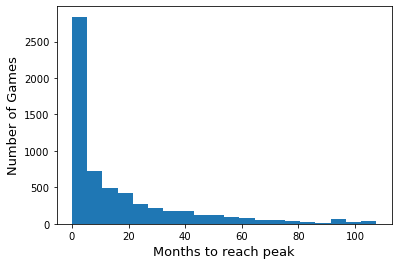

In [13]:
months = np.array(days)/30
plt.hist(months,20)
plt.xlabel('Months to reach peak', fontsize = 13)
plt.ylabel('Number of Games', fontsize = 13)

plt.savefig('reach_peak.png')
plt.show()

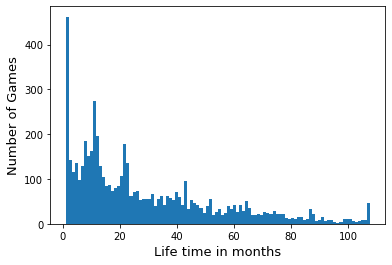

In [14]:
life = np.array(life)
plt.hist(life[life>0]/30,100,)
plt.xlabel('Life time in months', fontsize = 13)
plt.ylabel('Number of Games', fontsize = 13)
plt.savefig('life_time.png')
plt.show()

In [15]:
lofe = life/30
lofe = lofe[lofe>6]
lofe = lofe[lofe>0]
print('The total number of games that died after 6 months is ', len(lofe))

The total number of games that died after 6 months is  4718


In [16]:
lofe = life/30
lofe = lofe[lofe<=6]
lofe = lofe[lofe>0]
print('The total number of games that died before 6 months is ', len(lofe))

The total number of games that died before 6 months is  856


In [17]:
print('the number of games containing at least peak 1000 is ', len(games_alive))

#### app id for the games
block_busters = df.loc[games_alive]


the number of games containing at least peak 1000 is  881


In [18]:
#Status: if status is True, it means that the game died. If it is False, it means that the game is still alive.

df['Status'] = status
df['Life_time'] = life
df['Days_to_glory'] = days

Text(0, 0.5, 'Life time Days')

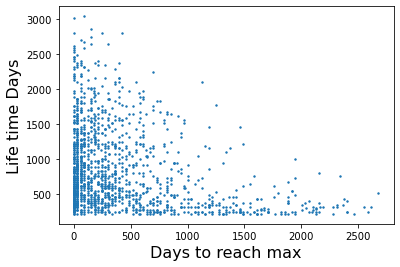

In [19]:
temp = df.loc[ df['Status'] == True ][['Days_to_glory','Life_time']]
plt.scatter(temp['Days_to_glory'], temp['Life_time'], s = 2)
plt.xlabel("Days to reach max", fontsize = 16)
plt.ylabel("Life time Days", fontsize = 16)

In [20]:
 df.loc[ (df['Status'] == True) & (df['Life_time']>2500) ][['Name','Days_to_glory','Life_time']]


,Name,Days_to_glory,Life_time
3027,Call of Duty: Modern Warfare 2 - Multiplayer,0.0,3014.0
3547,Call of Duty: Black Ops - Multiplayer,153.0,2647.0
4579,L.A. Noire,0.0,2526.0
5691,Just Cause 2,62.0,2709.0
6319,DmC Devil May Cry,151.0,2741.0
9031,Jagged Alliance - Back in Action,0.0,2556.0
9683,Crysis,92.0,2587.0
10939,Stronghold 3,0.0,2587.0
18379,Crysis Warhead,92.0,2679.0
20951,Insurgency: Modern Infantry Combat,304.0,2649.0


In [26]:
temp.loc[temp['Days_to_glory']>2500]

,Days_to_glory,Life_time
6191,2679.0,517.0
6287,2587.0,244.0
6687,2557.0,304.0
23639,2617.0,305.0


/Users/eduardomedina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


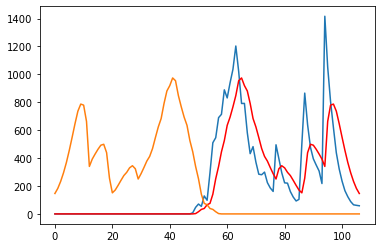

In [27]:

    
a = list(df_dummy_right.loc[50067])
b = np.arange(0,len(a))
arr = np.array(Reverse(a))
ses = SimpleExpSmoothing(arr)
fit = ses.fit(smoothing_level = .3 , optimized=False)
fitlist = list(fit.fittedvalues)
fitlistrev = Reverse(fitlist)



pd.concat([df_dummy_left, df_dummy_right], axis=1)



plt.plot(b,Reverse(a))

plt.plot(b, fit.fittedvalues,'r-', label = "Fitted Values")

plt.plot(b,fitlistrev)

## Survival  Attempt

In [58]:
data_y = df[['App_id','Status','Life_time']]

Text(0.5, 0, 'time $t$')

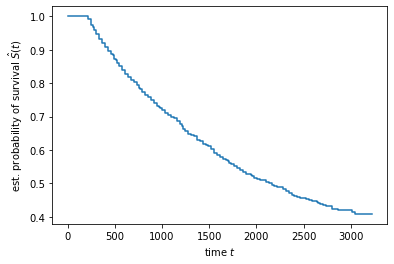

In [59]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["Status"], data_y["Life_time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [60]:
all_data_original = pd.read_csv('AllData.csv')
all_data_dummy = all_data_original.copy()

#Convert Categorical data to numeric data
for i in all_data_dummy.columns[19:54]:
    all_data_dummy[i] = all_data_dummy[i].astype(int)

print('the original number of games for all data was ',len(all_data_original))

the original number of games for all data was  10591


In [61]:
#Merge to remove games
app_id = df['App_id']
all_data = all_data_dummy.merge(app_id, how = 'inner', on = 'App_id')
print(len(app_id),len(all_data))

6036 5687


In [62]:
#Make data_x

#Drop non numeric data
data_x = all_data.drop(columns = ['App_id', 'Name', 'ReleaseDate', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
                         'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'PriceCurrency', 
                         'SupportEmail','SupportURL', 'AboutText','Background', 'ShortDescrip', 
                         'DetailedDescrip', 'DRMNotice','ExtUserAcctNotice', 'HeaderImage', 
                         'LegalNotice', 'Reviews','SupportedLanguages', 'Website', 'PCMinReqsText', 
                         'PCRecReqsText','LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText', 
                         'MacRecReqsText'])

data_x = data_x.drop(columns=[ 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'SteamSpyOwnersNew',
                              'peak_max', 'peak_mean', 'max', 'mean'])




In [63]:
data_y  = data_y.merge(all_data, how = 'right', on = 'App_id')
data_y = data_y[['Status','Life_time']]

struc = []
for i in data_y.values:
    struc.append((i[0],i[1]))
dt = np.dtype('bool,float')
struc = np.array(struc, dtype = dt)


In [64]:
cvdf = data_x.copy()
cvdf['Status'] = data_y['Status']
cvdf['Life_time'] = data_y['Life_time']

cvdf_train = cvdf.sample(int(len(cvdf)*.75)).copy()
cvdf_test= cvdf.drop(cvdf_train.index).copy()




In [65]:
from sklearn.base import clone
from sklearn.model_selection import KFold



estimator = CoxPHSurvivalAnalysis()

alpha_val = np.arange(0,30)

scores = np.empty((3,len(alpha_val)))



def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

kfold = KFold(n_splits = 3, shuffle = True, random_state = 440)


i = 0

for train_index, test_index in kfold.split(cvdf_train):
## For each possible model
    ## get X and y
    
    for j in range(len(alpha_val)):
    
        X, y = get_X_y(cvdf_train, cvdf_train.columns[:46], ['Status','Life_time'])


        # Get the cv train test split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        struc_train = []
        for k in y_train:
            struc_train.append((k[0],k[1]))
        dt = np.dtype('bool,float')
        struc_train = np.array(struc_train, dtype = dt)

        struc_test = []
        for k in y_test:
            struc_test.append((k[0],k[1]))
        dt = np.dtype('bool,float')
        struc_test = np.array(struc_test, dtype = dt)

        # Cloning the regression makes a fresh regression 
        # model for each run
        clone_estimator = clone(estimator)

        estimator = CoxPHSurvivalAnalysis(alpha = j)


        # fit the model
        clone_estimator.fit(X_train, struc_train)

        clone_estimator.score(X_test, struc_test)

        scores[i,j] = clone_estimator.score(X_test, struc_test)

    
    ## We'll now move to the next split
    i = i + 1



In [66]:

np.argmax(np.mean(scores, axis = 0))

print("The model with the highest score CV ",
     "was the one with alpha = ", alpha_val[np.argmax(np.mean(scores, axis = 0))],
     ". This model had a score CV of", np.round(np.max(np.mean(scores, axis=0)),5))


The model with the highest score CV  was the one with alpha =  2 . This model had a score CV of 0.61968


In [67]:
print(len(struc) ,len(data_x))

5687 5687


In [68]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis(alpha = alpha_val[np.argmax(np.mean(scores, axis = 0))])

struc_train = []
for i in cvdf_train[['Status','Life_time']].values:
    struc_train.append((i[0],i[1]))
dt = np.dtype('bool,float')
struc_train = np.array(struc_train, dtype = dt)


estimator.fit(cvdf_train[cvdf_train.columns[:46]], struc_train)



CoxPHSurvivalAnalysis(alpha=2)

In [69]:
pd.Series(estimator.coef_, index=data_x.columns)


RequiredAge                   -0.005499
DemoCount                      0.004234
DeveloperCount                 0.032296
DLCCount                      -0.001288
Metacritic                    -0.000600
MovieCount                     0.073089
PackageCount                   0.116135
RecommendationCount           -0.000007
PublisherCount                -0.396966
ScreenshotCount               -0.004451
AchievementCount               0.000157
AchievementHighlightedCount    0.013967
ControllerSupport             -0.008594
IsFree                        -0.123726
FreeVerAvail                   0.456313
PurchaseAvail                 -0.274575
SubscriptionAvail             -0.662324
PCReqsHaveMin                  0.041333
PCReqsHaveRec                  0.138133
LinuxReqsHaveMin               0.281795
LinuxReqsHaveRec              -0.356893
MacReqsHaveMin                -0.161183
MacReqsHaveRec                 0.070733
CategorySinglePlayer          -0.279623
CategoryMultiplayer           -0.173067


In [70]:
struc_test = []
for i in cvdf_test[['Status','Life_time']].values:
    struc_test.append((i[0],i[1]))
dt = np.dtype('bool,float')
struc_test = np.array(struc_test, dtype = dt)


print(estimator.score(cvdf_test[cvdf_train.columns[:46]], struc_test))




0.6049294324189135


In [71]:
import numpy as np

def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(data_x.values, struc)
pd.Series(scores, index=data_x.columns).sort_values(ascending=False)

GenreIsIndie                   0.564878
PriceInitial                   0.557379
PriceFinal                     0.557163
GenreIsAction                  0.539690
GenreIsCasual                  0.533123
ScreenshotCount                0.528037
Metacritic                     0.523523
GenreIsAdventure               0.522874
GenreIsSimulation              0.520834
RecommendationCount            0.519386
ControllerSupport              0.519377
GenreIsStrategy                0.518681
CategoryMultiplayer            0.518612
PublisherCount                 0.517238
CategoryMMO                    0.513921
DLCCount                       0.512355
GenreIsRPG                     0.512288
GenreIsFreeToPlay              0.512163
RequiredAge                    0.511282
MacReqsHaveRec                 0.510080
LinuxReqsHaveRec               0.509208
LinuxReqsHaveMin               0.509148
GenreIsMassivelyMultiplayer    0.508864
CategoryIncludeLevelEditor     0.508710
AchievementHighlightedCount    0.508363


In [72]:
data_x.loc[1]

RequiredAge                          0.00
DemoCount                            0.00
DeveloperCount                       1.00
DLCCount                             0.00
Metacritic                          83.00
MovieCount                           8.00
PackageCount                         1.00
RecommendationCount            1427633.00
PublisherCount                       1.00
ScreenshotCount                     15.00
AchievementCount                   167.00
AchievementHighlightedCount         10.00
ControllerSupport                    1.00
IsFree                               0.00
FreeVerAvail                         0.00
PurchaseAvail                        1.00
SubscriptionAvail                    0.00
PCReqsHaveMin                        1.00
PCReqsHaveRec                        0.00
LinuxReqsHaveMin                     1.00
LinuxReqsHaveRec                     0.00
MacReqsHaveMin                       1.00
MacReqsHaveRec                       0.00
CategorySinglePlayer              

In [73]:
data_x

,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal
0,0,0,1,0,86,11,1,1433797,1,30,...,0,0,0,0,0,0,0,1,29.99,29.99
1,0,0,1,0,83,8,1,1427633,1,15,...,0,0,0,0,0,0,0,0,14.99,14.99
2,0,0,1,0,90,4,0,590480,1,16,...,1,0,0,0,1,0,0,0,0.00,0.00
3,17,0,1,0,85,12,1,363009,1,11,...,0,1,0,0,0,0,0,0,59.99,59.99
4,17,0,1,7,84,10,1,72929,1,22,...,0,1,0,0,0,0,0,0,59.99,59.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,0,0,1,0,-1,1,0,0,1,4,...,0,0,1,0,1,1,1,0,0.00,0.00
5683,0,0,1,0,-1,1,0,0,2,8,...,0,0,1,0,0,0,0,0,0.00,0.00
5684,0,0,1,0,-1,1,1,136,1,10,...,0,0,0,0,0,0,0,0,7.99,2.39
5685,0,1,2,8,90,8,4,15442,2,29,...,1,0,0,0,0,0,0,0,24.99,24.99


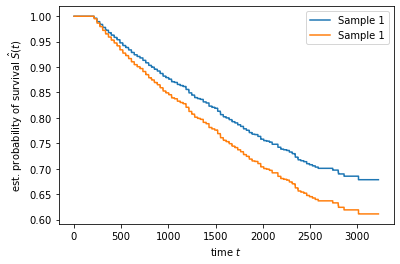

In [48]:
pred_surv = estimator.predict_survival_function(data_x.loc[20])
time_points = np.arange(1, 3226)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post",
             label="Sample %d" % (i + 1))
    
pred_surv = estimator.predict_survival_function(data_x.loc[50])
time_points = np.arange(1, 3226)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post",
             label="Sample %d" % (i + 1))
    

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.show()

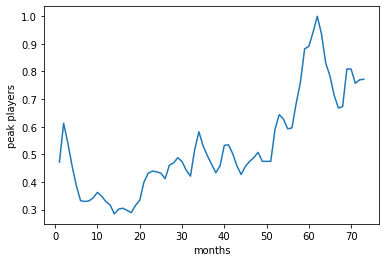

In [50]:
ar = df.loc[df['App_id']==271590].values[0][6:113]
ra = []
for i in reversed(list(ar[ar>0])):
    ra.append(i)
    
peak_players = np.array(ra)
peak_players = peak_players/peak_players.max()

months = np.arange(1,len(ra)+1)

plt.plot(months,peak_players)


plt.ylabel("peak players")
plt.xlabel("months")
plt.show()


In [54]:
data_y = df[['App_id','Status','Life_time']]

In [55]:
data_y
all_data

merged = data_y.merge(all_data, how = 'inner', on = 'App_id')

merged

,App_id,Status,Life_time,Name,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,SteamSpyOwnersNew,peak_max,peak_mean,max,mean
0,730,False,0.0,Counter-Strike: Global Offensive,Aug 21 2012,0,0,1,0,83,...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,83851000.0,1305714.0,5.562232e+05,857604.22,316635.260189
1,570,False,1826.0,Dota 2,Jul 9 2013,0,0,1,0,90,...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,174686000.0,1291328.0,7.820687e+05,709178.26,452757.727453
2,578080,False,1126.0,PLAYERUNKNOWN'S BATTLEGROUNDS,Dec 21 2017,0,0,1,0,86,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,56061000.0,3236027.0,1.038021e+06,1584886.77,470328.382800
3,1172470,False,0.0,Apex Legends,Nov 4 2020,0,0,1,7,88,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,23823000.0,228439.0,1.670272e+05,126121.06,97200.430000
4,440,False,61.0,Team Fortress 2,Oct 10 2007,0,0,1,0,92,...,Recommended:OS: Windows(r) 7 (32/64-bit)Proces...,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X version Leopard 10.5.8 and ab...,,52761000.0,146887.0,8.203210e+04,101230.91,53556.196792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,414720,False,1673.0,Astrox: Hostile Space Excavation,Nov 30 2015,0,0,1,0,-1,...,Recommended:OS: Windows 7+,Minimum:OS: Ubuntu 12.04+ / SteamOS+Processor:...,,Minimum:OS: Mac OS X 10.7+Processor: 1.00 GhzM...,,65000.0,130.0,2.513846e+01,24.07,7.029538
5683,838900,False,912.0,Cereal Soup,Jun 2 2018,0,0,1,0,-1,...,Recommended:Memory: 8 GB RAM,Minimum:Memory: 2 GB RAM,Recommended:Memory: 4 GB RAM,Minimum:Memory: 4 GB RAM,Recommended:Memory: 8 GB RAM,143000.0,145.0,3.285294e+01,62.34,12.054412
5684,365300,True,914.0,Transmissions: Element 120,Jun 16 2016,0,0,3,0,-1,...,Recommended:OS: Windows(r) 10/8/7 32/64-bit / ...,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,,,789000.0,779.0,7.006780e+01,338.08,26.621695
5685,822800,True,242.0,Soulfire,Aug 3 2020,0,0,1,1,-1,...,,,,,,26000.0,554.0,5.942857e+01,58.48,9.503333


In [56]:
grade1_app_id = merged.loc[merged['mean'] >= 250]['App_id']
grade0_app_id = merged.loc[merged['mean'] < 11]['App_id']

grade1 = df.copy()
grade1 = grade1.set_index('App_id').loc[grade1_app_id]

grade0 = df.copy()
grade0 = grade0.set_index('App_id').loc[grade0_app_id]


print('The number of games in grade 1 is ', len(grade1)) 
print('The number of games in grade 0 is ', len(grade0))

print('Total number of games is ',len(grade1) + len(grade0))

print('Total of games lost is ',len(data_y) - len(grade1) - len(grade0))

The number of games in grade 1 is  1053
The number of games in grade 0 is  1103
Total number of games is  2156
Total of games lost is  3880


The number of death grade 1 games is  174
The number of death grade 0 games is  328
Games lost due to filtering for grade 1  879
Games lost due to filtering for grade 0  775


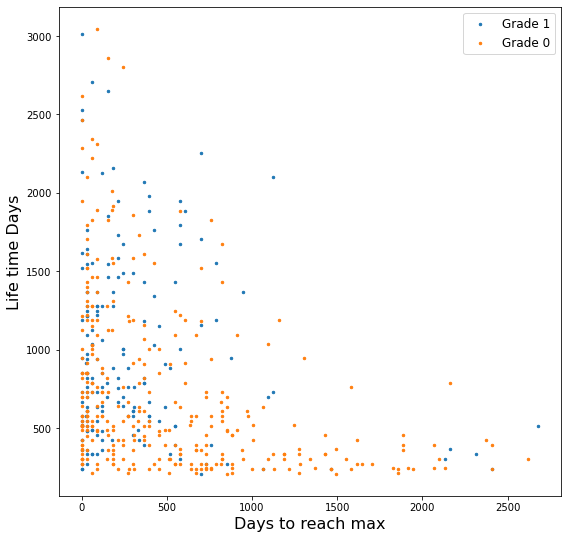

In [57]:
plt.figure(figsize = (9,9))



temp1 = grade1.loc[ grade1['Status'] == True ][['Days_to_glory','Life_time']]
plt.scatter(temp1['Days_to_glory'], temp1['Life_time'], s = 6, label= 'Grade 1')


temp0 = grade0.loc[ grade0['Status'] == True ][['Days_to_glory','Life_time']]
plt.scatter(temp0['Days_to_glory'], temp0['Life_time'], s = 6, label = 'Grade 0')
plt.legend(fontsize=12)




plt.xlabel("Days to reach max", fontsize = 16)
plt.ylabel("Life time Days", fontsize = 16)

print('The number of death grade 1 games is ', len(temp1))
print('The number of death grade 0 games is ', len(temp0))

print('Games lost due to filtering for grade 1 ', len(grade1) - len(temp1))

print('Games lost due to filtering for grade 0 ', len(grade0) - len(temp0))



